In [1]:
import numpy as np

import pandas as pd

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, LassoCV


import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
hp = pd.read_csv('house_price.csv')
print(hp.head(10))
print(hp.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [3]:
#dropping the columns containing a lot of null values
hp=hp.drop(['Alley', 'LotFrontage', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1)

C:\Users\nipin\AppData\Local\Temp\ipykernel_12136\851792988.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hp.corr(),annot=True, cmap="RdBu_r", center =0);


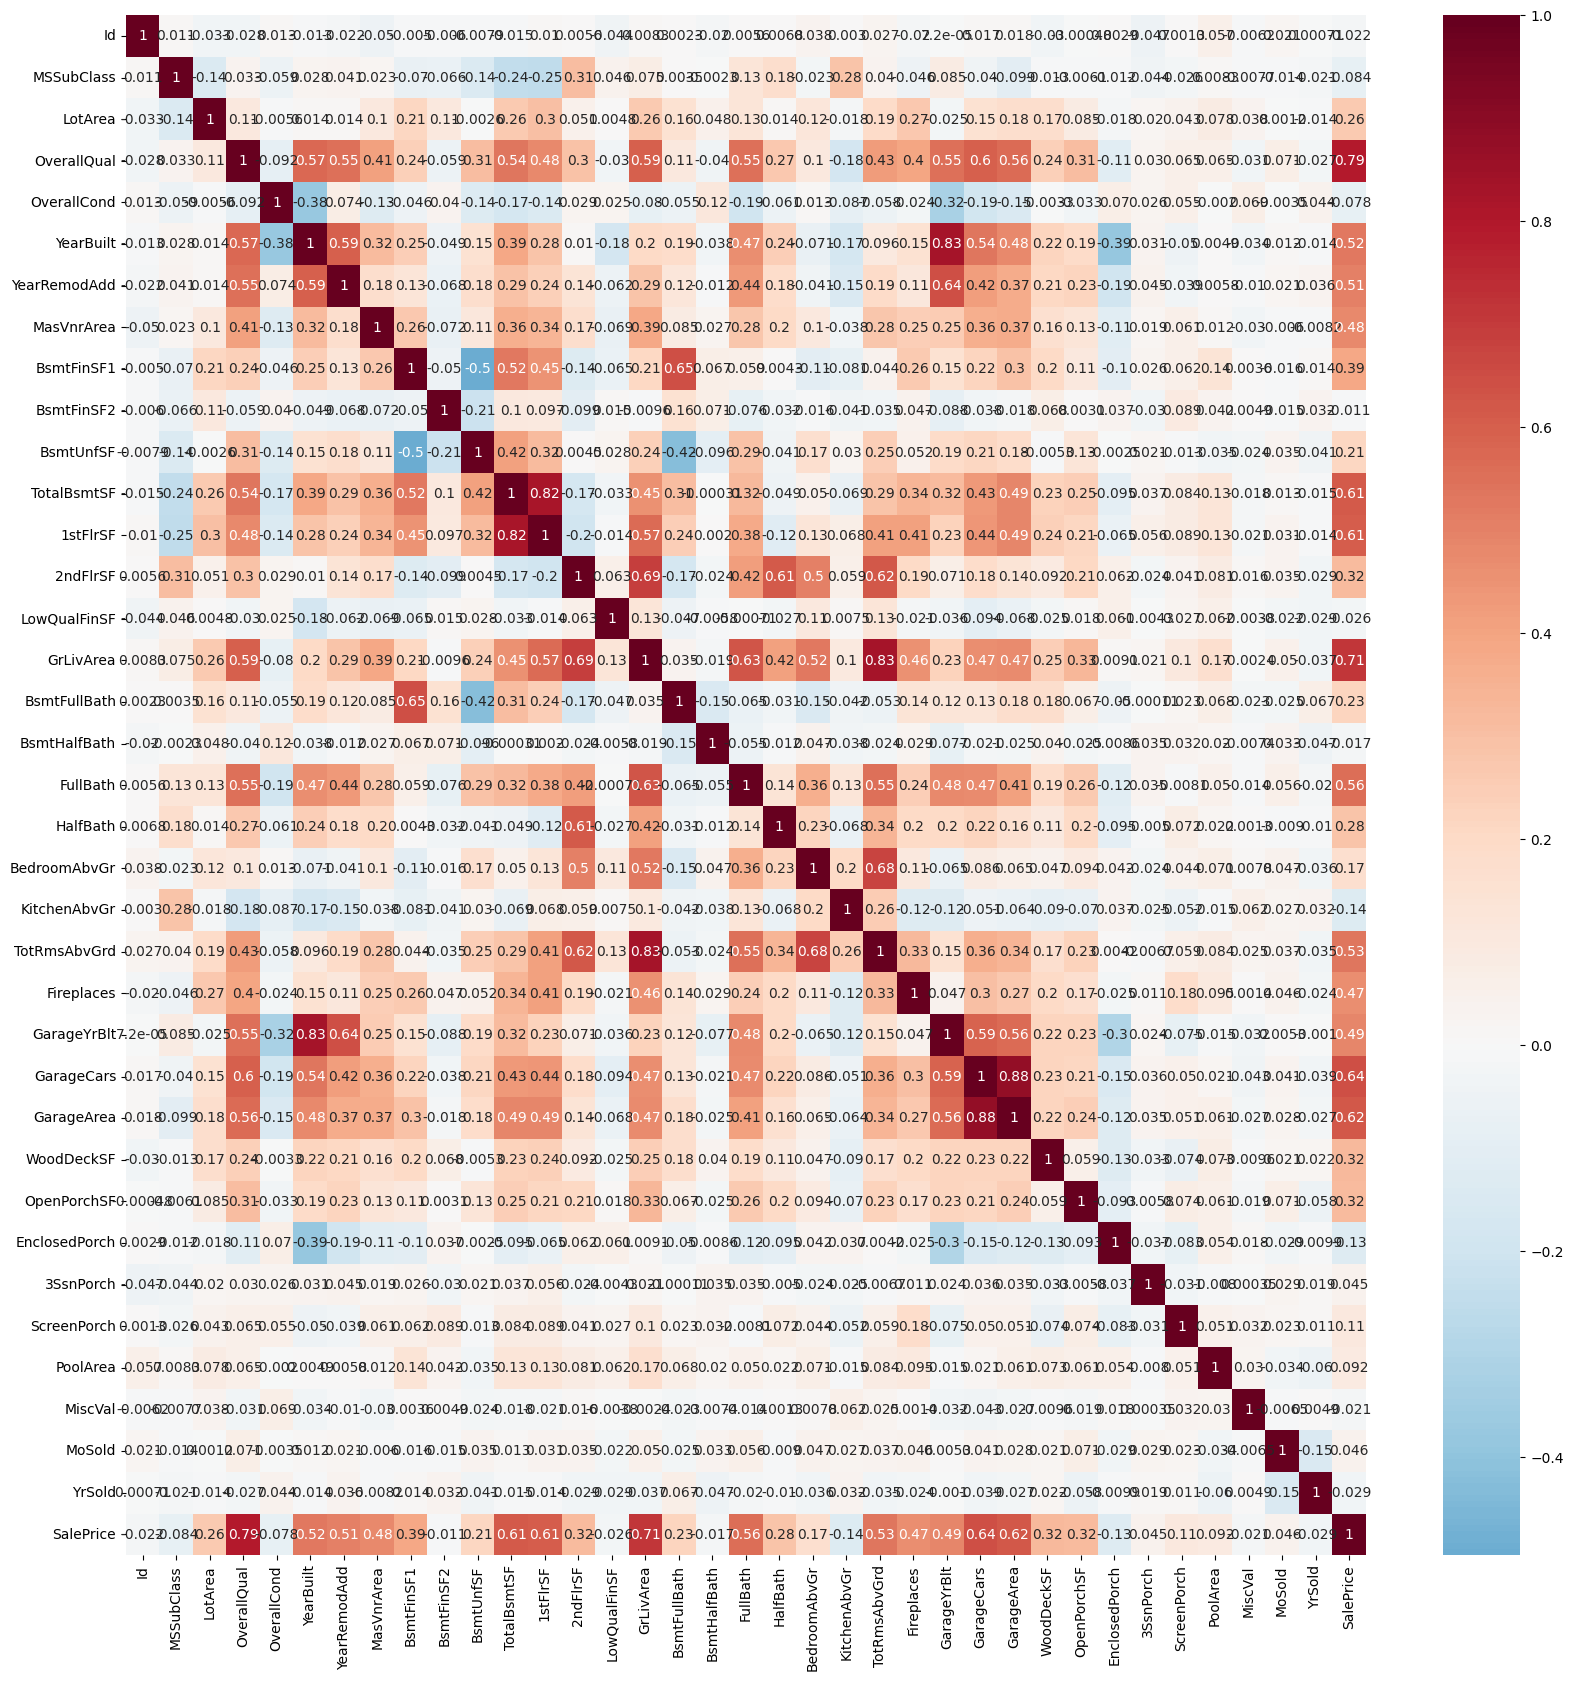

In [4]:
# to check the correlation of numerical variables we plot heatmap (it itself takes only nuneric variables)
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(hp.corr(),annot=True, cmap="RdBu_r", center =0);

In [5]:
#removing the columns that are least correlated and irrelevant. These columns contain only numeric values.
hp=hp.drop(['Id', 'MSSubClass', 'LotArea', 'OverallCond','YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF2', 
            'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF', 
            'EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], axis =1)

In [6]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  OverallQual    1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [7]:
# removing other variables (features) which are similar for e.g. out of Condition 1 and Condition 2,............ 
# ..................................we can drop one of these.....similarly for other variables (features)

#hp=hp.drop(['LotConfig','LandSlope','Condition2','HouseStyle','RoofMatl', 'Exterior2nd','MasVnrType', 'ExterQual',
#         'BsmtQual', 'BsmtExposure','BsmtFinType1','HeatingQC', 'Functional', 'GarageType','GarageYrBlt','GarageFinish',
 #           'GarageQual','PavedDrive','SaleType', 'SaleCondition', 'Heating', 'CentralAir', 'Electrical',
  #         'Exterior1st','Street', 'BsmtFinType2', 'Condition1','BldgType', 'RoofStyle','MSZoning','LotShape', 
  #        'BsmtQual' ,'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2','Fireplaces' ], axis =1)

In [8]:
#import seaborn as sns

#plt.figure(figsize=(20,20))
#sns.heatmap(hp.corr(),annot=True, cmap="RdBu_r", center =0);

In [9]:
#hp.info()

In [10]:
#Dropping the irrelevant variables (least correlated with target)
cat_cols = hp.select_dtypes(include=['object']).columns.tolist()
num_cols = hp.select_dtypes(exclude=['object']).columns.tolist()


In [11]:
hp[num_cols]=hp[num_cols].fillna(hp[num_cols].mean())

#hp[['MasVnrType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 
      #  'BsmtFinType2', 'Electrical', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum(axis=0)
                                                                                                          
#hp[cat_cols]=hp[cat_cols].fillna(hp[cat_cols].mode())                                      
#hp['BsmtCond']=hp['BsmtCond'].fillna(hp['BsmtCond'].mode()[0])
#hp['GarageCond'] = hp['GarageCond'].fillna(hp['GarageCond'].mode()[0])
                                                                
#hp['GarageCond'].value_counts()
                                               

In [12]:
hp[cat_cols] = hp[cat_cols].fillna(hp[cat_cols].mode().iloc[0])
hp.isnull().sum(axis=0)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [13]:
#cat_cols = hp.select_dtypes(include=['object']).columns.tolist()
#num_cols = hp.select_dtypes(exclude=['object']).columns.tolist()
#cat_features==[i for i in df.columns if df.dtypes[i]=='object']
#numCols = X.select_dtypes("number").columns
#catCols = X.select_dtypes("object").columns
#numCols= list(set(numCols))
#catCols= list(set(catCols))
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
#print(num_cols)
#print(cat_cols)

In [14]:
scaler = preprocessing.StandardScaler()
#df[df.columns] = pd.DataFrame(scaler.fit_transform(df))
hp[num_cols] = pd.DataFrame(scaler.fit_transform(hp[num_cols]))
hp

#X_numeric_std = pd.DataFrame(data=scaler.fit_transform(X[numeric]), columns=numeric)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,0.311725,0.351000,TA,TA,Y,WD,Normal,0.347273
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,0.311725,-0.060731,TA,TA,Y,WD,Normal,0.007288
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,0.311725,0.631726,TA,TA,Y,WD,Normal,0.536154
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,1.650307,0.790804,TA,TA,Y,WD,Abnorml,-0.515281
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,1.650307,1.698485,TA,TA,Y,WD,Normal,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,RFn,0.311725,-0.060731,TA,TA,Y,WD,Normal,-0.074560
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,Unf,0.311725,0.126420,TA,TA,Y,WD,Normal,0.366161
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Attchd,RFn,-1.026858,-1.033914,TA,TA,Y,WD,Normal,1.077611
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,-1.026858,-1.090059,TA,TA,Y,WD,Normal,-0.488523


In [15]:
#hp.corr()
#import seaborn as sns

#plt.figure(figsize=(20,20))
#sns.heatmap(hp.corr(),annot=True, cmap="RdBu_r", center =0)
#hp = hp.join(pd.get_dummies(cat_cols))

In [16]:
dummies=pd.get_dummies(hp[cat_cols])


In [17]:
hp_new = pd.concat([hp[num_cols],dummies], axis=1)

In [18]:
hp_new.columns


Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=242)

In [19]:
#print(hp.info())
#print(hp.head())
#hp.columns

In [20]:
#new_df = pd.concat([hp['SalePrice'],pd.get_dummies(hp[cat_cols])], axis=1)


In [21]:
#new_df.info()

In [22]:
#plt.figure(figsize=(80,80))
#sns.heatmap(new_df.corr(),annot=True, cmap="RdBu_r", center =0);

In [23]:
target= hp_new['SalePrice']
target
# removing the original columns as these are now dichotomized, and we will consider those
#feats= hp.drop(['SalePrice', 'LandContour', 'Utilities', 'Neighborhood','ExterCond','Foundation','KitchenQual'], axis=1)



0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [24]:
feats = hp_new.drop('SalePrice', axis=1)
                
feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 241 entries, OverallQual to SaleCondition_Partial
dtypes: float64(7), uint8(234)
memory usage: 413.6 KB


In [25]:
#feats = feats.drop('SalePrice', axis=1)

In [26]:
#feats.columns


In [27]:
#print(feats)
#target
#feats['Street_Pave'] = feats['Street_Pave'].astype('float')
#feats

In [28]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state= 101)

In [42]:
#Create a function rmse_cv, which for a given model calculates the Root Mean Square Error (RMSE) obtained by cross-validation 
#at 5 samples, using the function cross_val_score of sklearn.model_selection.
def rmse_cv(model):     
    score= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))     
    rmse=score.mean()
    return rmse

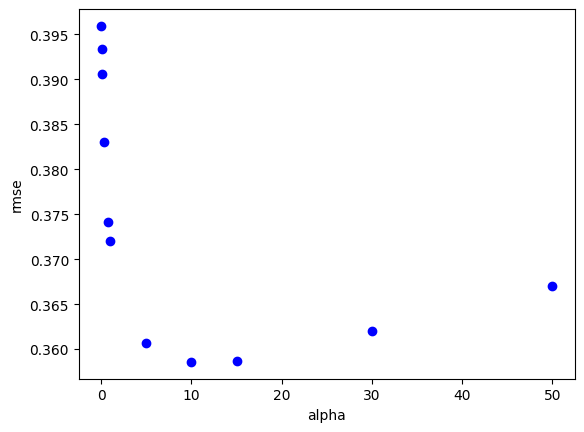

In [46]:
alphas =[0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30, 50]
score=[]
for a in alphas:
    ridge_reg = Ridge(alpha = a)
    ridge_reg.fit(X_train, y_train)
    score=rmse_cv(ridge_reg)
    plt.plot(a, score, 'bo')
    plt.xlabel('alpha')
    plt.ylabel('rmse')
plt.show()

In [ ]:
print('The best alpha from the graph is 10')

In [50]:
ridge_best = Ridge(alpha = 10)
ridge_best.fit(X_train, y_train)
pred_test  = ridge_best.predict(X_test)
pred_train = ridge_best.predict(X_train)
#print("score train :", ridge_best.score(X_train, y_train))
#print("score test :", ridge_best.score(X_test, y_test))
#print("The RMSE on test set is : " , np.sqrt(mean_squared_error(y_test, pred_test)))
#print("The RMSE on train set is : " , np.sqrt(mean_squared_error(y_train, pred_train)))
print('mean square error for pred_test is', mean_squared_error(pred_test, y_test))

mean square error for pred_test is 0.2848167347265414


In [ ]:
#from sklearn.linear_model import RidgeCV
#ridge_reg = RidgeCV(alphas= (0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30, 50))
#ridge_reg.fit(X_train, y_train) 

In [32]:
#alphas =(0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30, 50)
#for ridge_reg = RidgeCV(alphas = alphas)
#ridge_reg.fit(X_train, y_train)

#Plot the RMSE returned by the function rmse_cv applied to a Ridge regression model (alpha =  αα ) 
#for each  αα  belonging to alphas

In [33]:
#print( "alpha selected by c-v :" ,ridge_reg.alpha_)
#rmse_cv(ridge_reg)

In [34]:
### try with random alphas

#def rmse_cv1(model):     
#    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=2))     
#    return rmse
#alphas1 =(0.04, 0.08, 0.5, 7,20)
#for a in alphas1:
#ridgemodel = Ridge(alpha=a)
#    ridgemodel.fit(X_train, y_train)

In [35]:
### try with random alphas .....related to above cell
#for a in alphas1:
#    x=rmse_cv1(ridgemodel)
#print(x)
#print(a)

In [36]:
#rmse_value=[]
#alpha=[]
#for a in alphas:
 #   x=rmse_cv(ridge_reg)
#    rmse_value.append(x)
#    alpha.append(a)
#print(rmse_value)
#print(alpha)
#x.shape

#for a in alphas:
#    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
#    ridge.fit(X, y)
 #   coefs.append(ridge.coef_)
    
#for i in range(ridge_reg.rmse_path_.shape[0]) :
#    plt.plot(alphas, ridge_reg.rmse_path_[i,:,:].mean(axis=1),
#         label='Mean for l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth=2)
    
#for i in range(ridge_reg.rmse_path_.shape[0]) :
#    plt.plot(alphas, ridge_reg.rmse_path_[i,:,:].mean(axis=1),
#         label='Mean for l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth=2)    

In [37]:
#rmse_value=[]
#for a in alphas:
#    plt.plot(alphas, rmse_cv(ridge_reg))
    #rmse_value.append(x)
#plt.show()


#plt.figure(figsize = (10,10))

#for i in range(ridge_reg.rmse_path_.shape[0]) :
#    plt.plot(alphas, ridge_reg.rmse_path_[i,:,:].mean(axis=1),
#          linewidth=2)
#plt.show()

In [38]:
#LASSO CV
#   1...Create a Lasso regression model that will choose the parameter  αα  by cross validation from [10, 1, 0.1, 0.1, 0.001, 
 # 0.0005], using the LassoCV function
#  2...Display the model performance on the test set
#from sklearn.linear_model import LassoCV

#model_lasso = LassoCV(cv=10, alphas = (10, 1, 0.1, 0.1, 0.001, 0.0005)).fit(X_train, y_train)

#lasso_pred_test = model_lasso.predict(X_test)
#print(model_lasso.score(X_test,y_test))
#print("mse test:", mean_squared_error(lasso_pred_test, y_test))

0.7120951717400772
mse test: 0.271757966893806


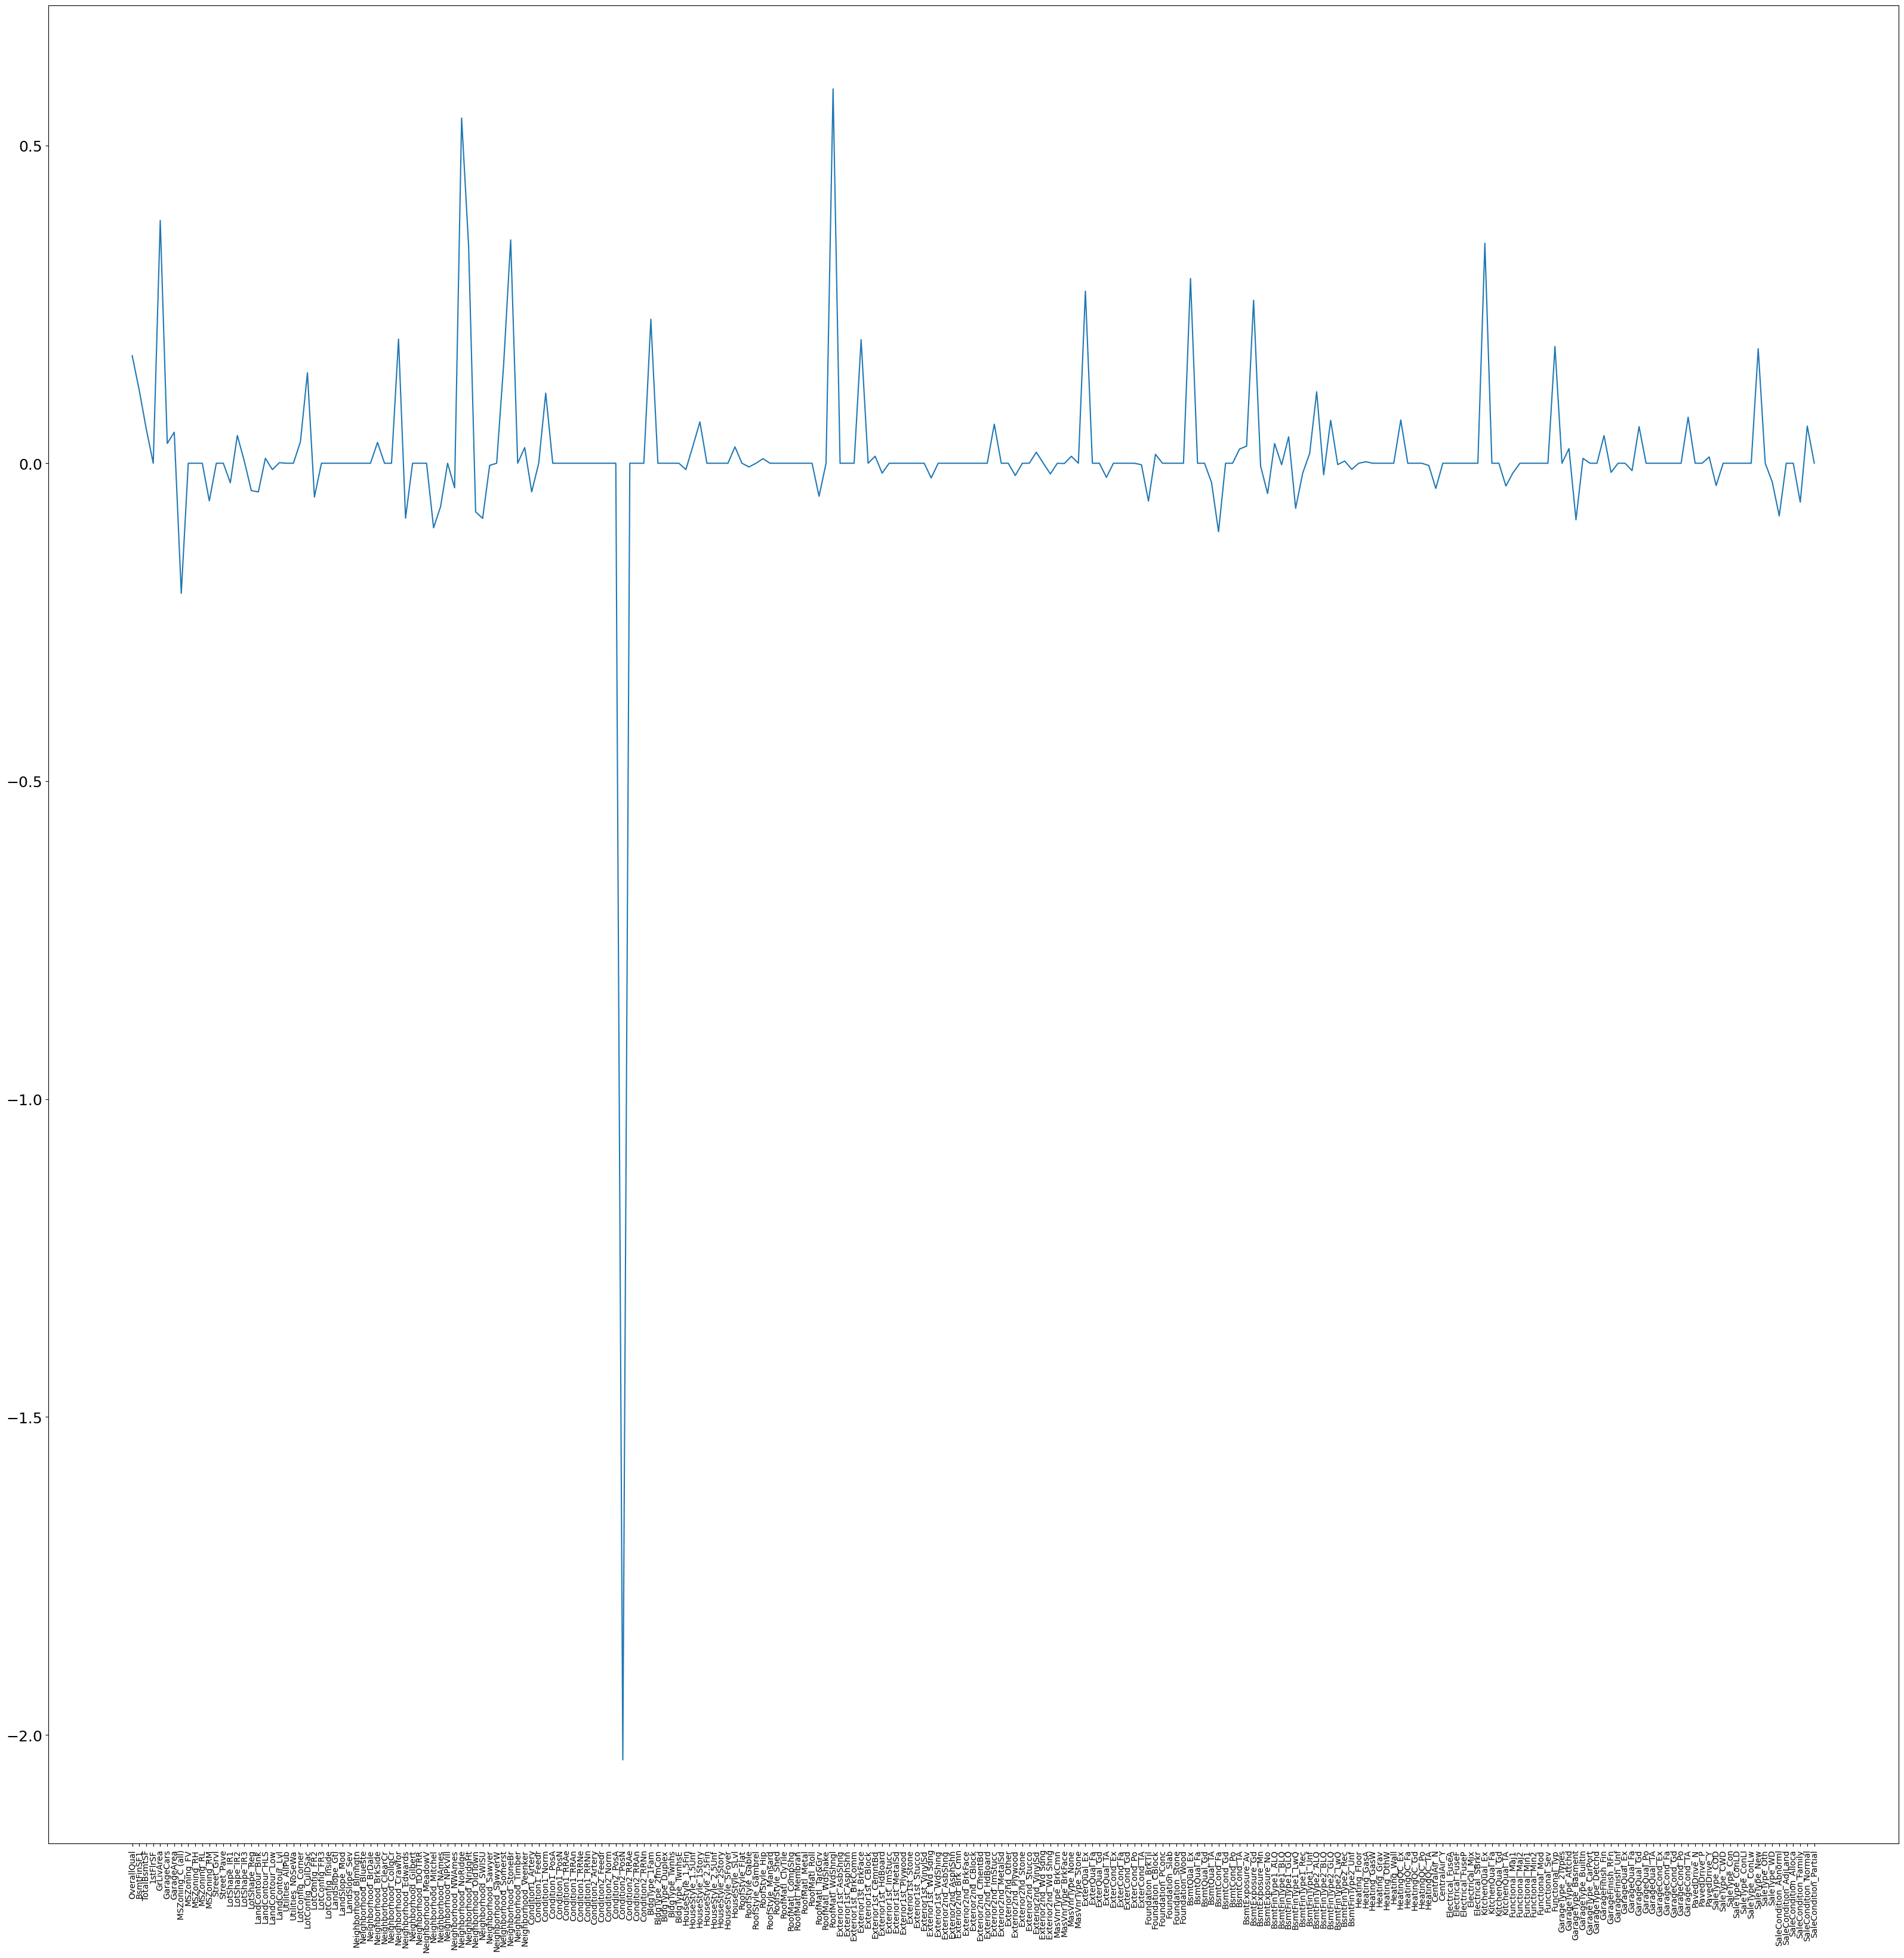

In [39]:
#From the coefficients returned by the Lasso regression model, display the number of variables kept and the number of 
#variables eliminated by the model
#plt.figure(figsize=(40,40))
#plt.plot(feats.columns, model_lasso.coef_)
#plt.xticks(rotation=90)
#plt.yticks(fontsize=18);


In [44]:
#from sklearn.linear_model import lasso_path
#my_alphas = [0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0]

#alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=my_alphas)

#print(coefs_lasso.shape)
#model_lasso.alpha_


(241, 10)


0.001

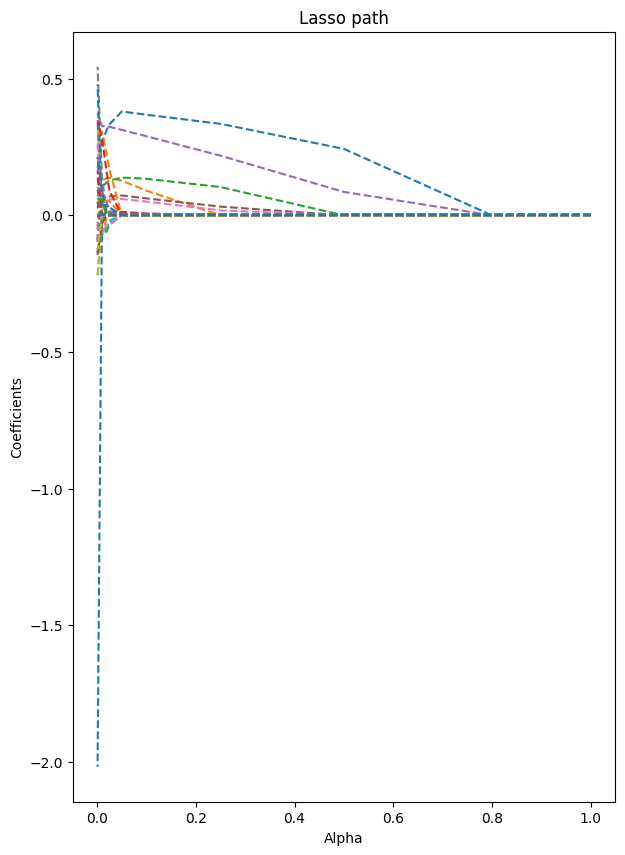

In [47]:
#import matplotlib.cm as cm

#plt.figure(figsize=(7,10))

#for i in range(coefs_lasso.shape[0]):
 #   plt.plot(alpha_path, coefs_lasso[i,:], '--')

#plt.xlabel('Alpha')
#plt.ylabel('Coefficients')
#plt.title('Lasso path')
#plt.show()


In [50]:
#print('the best alpha is', model_lasso.alpha_)
#print(list(zip(model_lasso.coef_, feats)))

In [49]:
#print('the best alpha is', model_lasso.alpha_)
#from sklearn.linear_model import Lasso
#lasso_best = Lasso(alpha=model_lasso.alpha_)
#lasso_best.fit(X_train, y_train)
#print(list(zip(lasso_best.coef_, feats)))

the best alpha is 0.001
[(0.1692090405009892, 'OverallQual'), (0.11500695424388602, 'BsmtFinSF1'), (0.054267965009721496, 'TotalBsmtSF'), (0.0, '1stFlrSF'), (0.3818113900284273, 'GrLivArea'), (0.03118245303944534, 'GarageCars'), (0.04877635235235916, 'GarageArea'), (-0.20464054418882102, 'MSZoning_C (all)'), (0.0, 'MSZoning_FV'), (0.0, 'MSZoning_RH'), (0.0, 'MSZoning_RL'), (-0.05914527032960265, 'MSZoning_RM'), (-0.0, 'Street_Grvl'), (0.0, 'Street_Pave'), (-0.030651517297925406, 'LotShape_IR1'), (0.04369432345440546, 'LotShape_IR2'), (0.0029491566113465364, 'LotShape_IR3'), (-0.043039709770922266, 'LotShape_Reg'), (-0.04508106802869562, 'LandContour_Bnk'), (0.007764857821928342, 'LandContour_HLS'), (-0.010036443310421847, 'LandContour_Low'), (0.0009201024495059021, 'LandContour_Lvl'), (0.0, 'Utilities_AllPub'), (-0.0, 'Utilities_NoSeWa'), (0.03373894108440569, 'LotConfig_Corner'), (0.1423137860543154, 'LotConfig_CulDSac'), (-0.05312016926626336, 'LotConfig_FR2'), (-0.0, 'LotConfig_FR3'

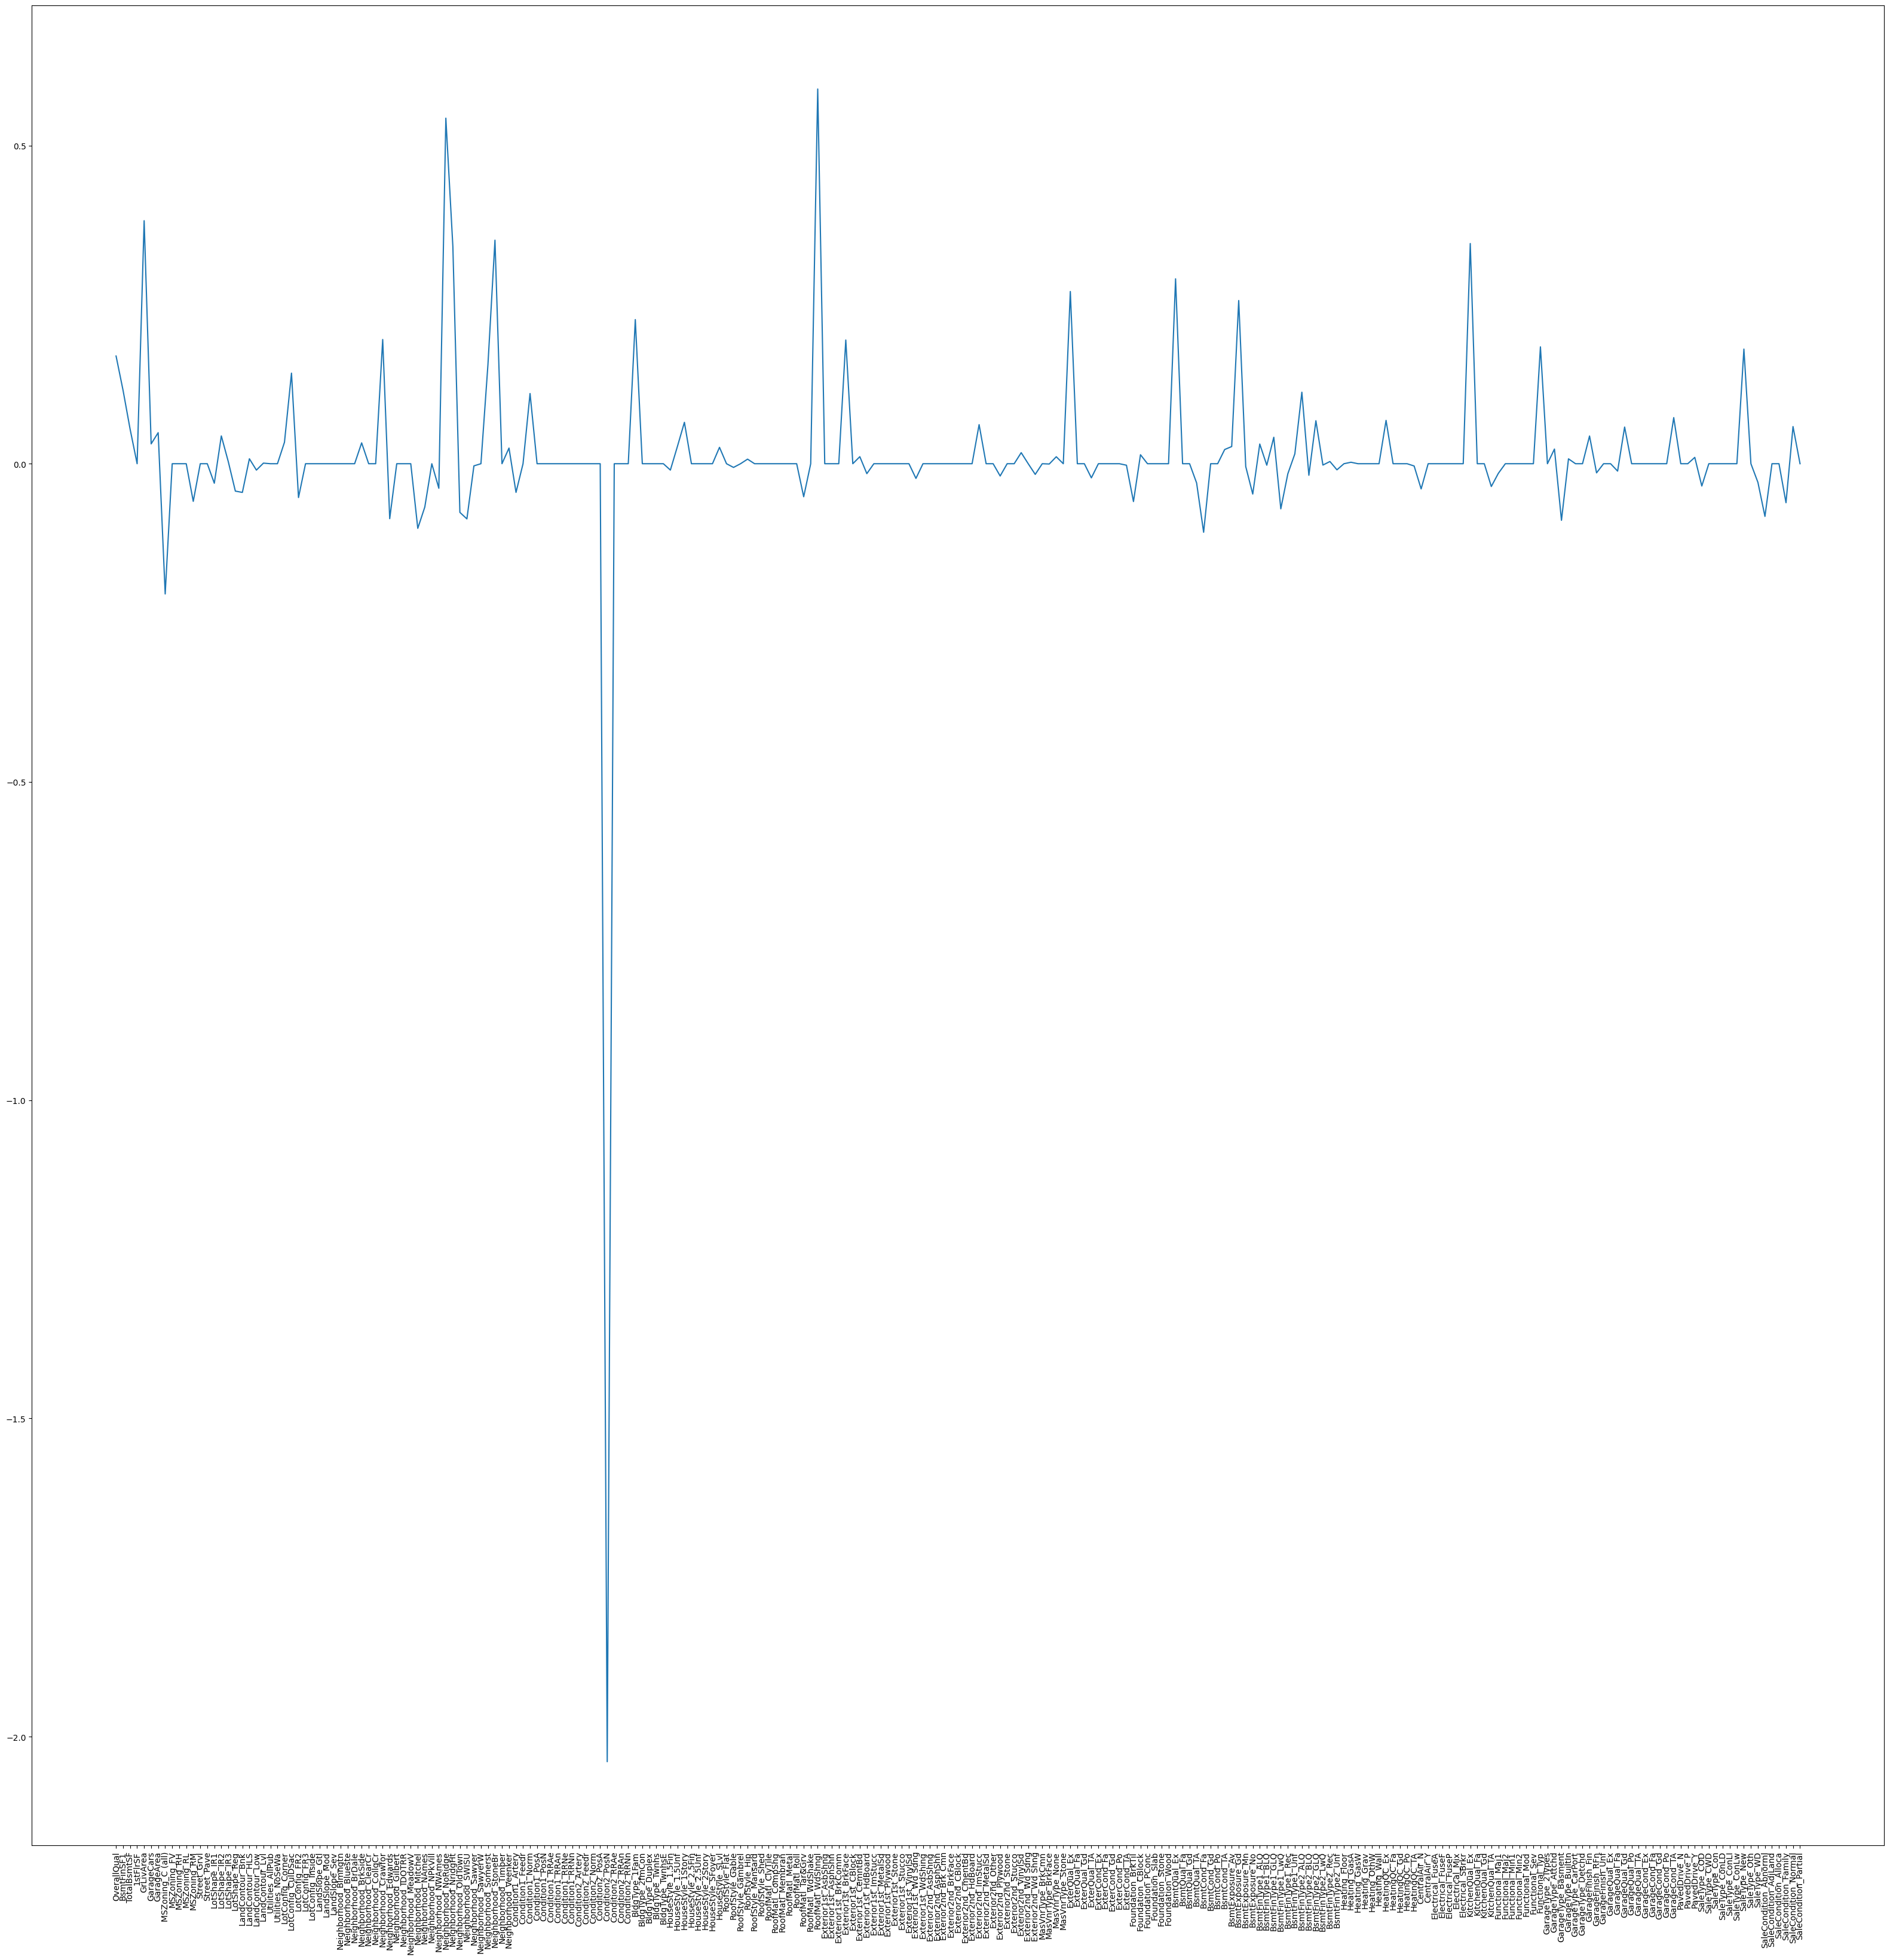

In [107]:
#lasso_coef = model_lasso.coef_
#plt.figure(figsize=(40,40))
#plt.plot(range(len(feats.columns)), lasso_coef)
#plt.xticks(range(len(feats.columns)), feats.columns.values, rotation=90)
#plt.show()

In [ ]:
#Display the most important variables of the model, relative to the calculated coefficients